In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import numpy as np
from nips.environment.environment import TestEnvironment
from explauto.environment.context_environment import ContextEnvironment

env_cls = TestEnvironment

env_conf = dict(m_mins=[-1.]*32, 
                m_maxs=[1.]*32, 
                s_mins=[-1.]*110, 
                s_maxs=[1.]*110)


context_mode = dict(mode='mcs',
                    context_n_dims=2,
                    context_sensory_bounds=[[-1., -1.],[1., 1.]])


environment = ContextEnvironment(env_cls, env_conf, context_mode)


In [3]:
from nips.learning.supervisor import Supervisor

agent = Supervisor(environment)

In [4]:
for iteration in range(10000):
    context = environment.get_current_context()
    m = agent.produce(context)
    s = environment.update(m)
    agent.perceive(s)


iterations 1000
progresses [ 0.0190927   0.01889809  0.0076484  -0.00388908  0.12659517  0.15810733]
interests [ 0.0190927   0.01889809  0.0076484   0.00388908  0.12659517  0.15810733]
im db n points [63, 66, 126, 67, 294, 383]
{'mod1': 63, 'mod2': 66, 'mod3': 126, 'mod4': 67, 'mod5': 294, 'mod6': 383}

iterations 2000
progresses [ 0.04557467  0.05381698  0.01306913  0.00548     0.20571841  0.23419207]
interests [ 0.04557467  0.05381698  0.01306913  0.00548     0.20571841  0.23419207]
im db n points [150, 170, 179, 100, 631, 769]
{'mod1': 150, 'mod2': 170, 'mod3': 179, 'mod4': 100, 'mod5': 631, 'mod6': 769}

iterations 3000
progresses [  6.60207401e-02   9.06223235e-02   5.93739614e-03   6.26477041e-07
   2.47785387e-01   2.70943043e-01]
interests [  6.60207401e-02   9.06223235e-02   5.93739614e-03   6.26477041e-07
   2.47785387e-01   2.70943043e-01]
im db n points [243, 320, 218, 130, 945, 1143]
{'mod1': 243, 'mod2': 320, 'mod3': 218, 'mod4': 130, 'mod5': 945, 'mod6': 1143}

iteratio

In [5]:
print agent.chosen_modules
print [len(agent.modules[mid].interest_model.data_xc) for mid in agent.modules.keys()]

{'mod1': 1260, 'mod2': 1413, 'mod3': 910, 'mod4': 480, 'mod5': 2834, 'mod6': 3103}
[1260, 1413, 910, 480, 2834, 3103]


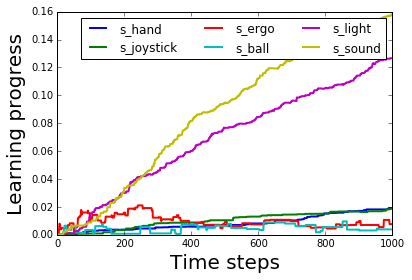

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(np.array(agent.interests_evolution[:1000]), lw=2)
ax.legend(["s_hand", "s_joystick", "s_ergo", "s_ball", "s_light", "s_sound"], ncol=3)
ax.set_xlabel('Time steps', fontsize=20)
ax.set_ylabel('Learning progress', fontsize=20)